<a href="https://colab.research.google.com/github/TonyStone23/Summer_Research_2025/blob/main/weekTwo/ANN/gila_riverANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

randomState = 42

In [76]:
data = pd.read_csv('gila_river.csv')
data.head()

,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [77]:
X = data.drop(columns='y(t)')
y = data['y(t)']

In [78]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = randomState)

In [79]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
# Create model
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter = 3000)

In [81]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [82]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [83]:
mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

print(f"Training Case MSE: {mse_train:.5f}\nTesting Case MSE: {mse_test:.5f}")

Training Case MSE: 67107.91892
Testing Case MSE: 34226.44851


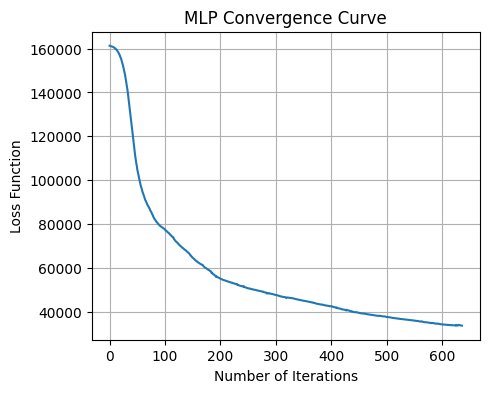

In [84]:
plt.figure(figsize = (5,4))
plt.plot(mlp.loss_curve_)
plt.title("MLP Convergence Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Function")
plt.grid(True)
plt.show()

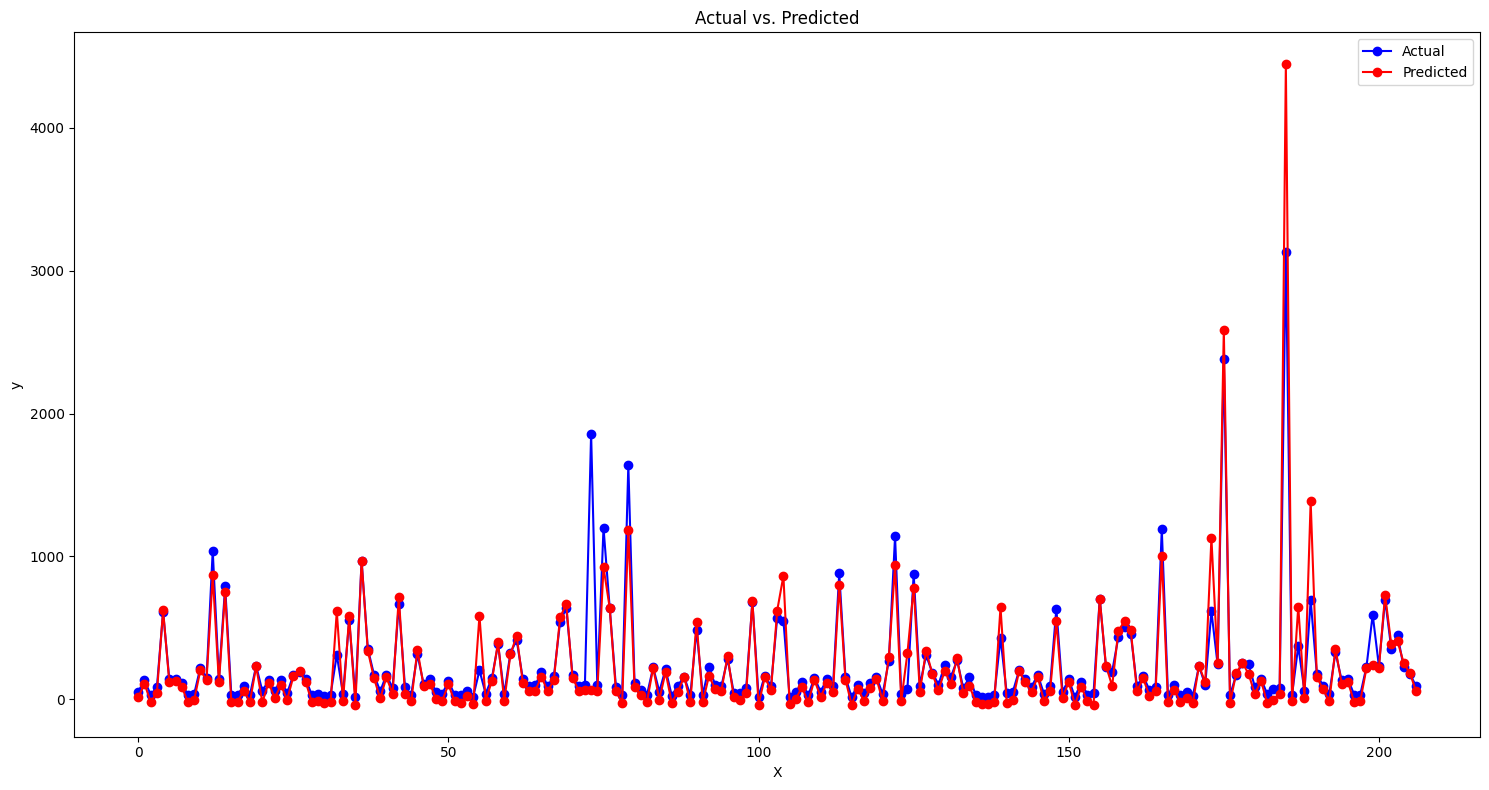

In [85]:
t = range(len(y_test))

plt.figure(figsize = (15, 8))
plt.plot(t, y_test, label = 'Actual', color = 'blue', marker = 'o')
plt.plot(t, y_test_pred, label = 'Predicted', color = 'red',marker = 'o')
plt.legend()
plt.title("Actual vs. Predicted")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

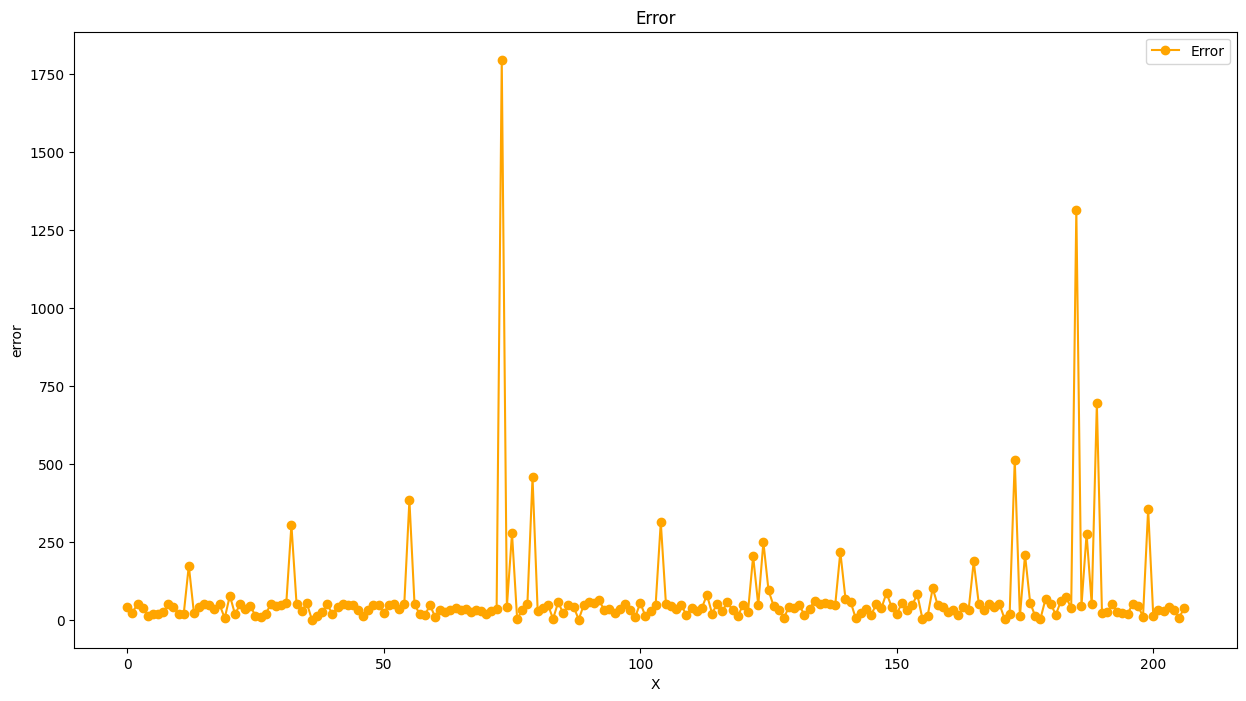

In [86]:
plt.figure(figsize = (15, 8))
plt.plot(t, abs(y_test_pred - y_test), label = 'Error', color = 'orange', marker = 'o')
plt.legend()
plt.title("Error")
plt.xlabel("X")
plt.ylabel("error")

plt.show()